In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# imported data and selected important columns
ind_spendings = pd.read_csv('data/2020_independent_expenditures.csv')
ind_spendings = ind_spendings[['candidate_name','payee_name', 'expenditure_description','expenditure_amount','payee_state']]
ind_spendings


/Users/brianlin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (54,55,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,candidate_name,payee_name,expenditure_description,expenditure_amount,payee_state
0,"BIDEN, JOSEPH JR",ZERO WEEK SOLUTIONS,TEXT MESSAGING,60000.00,CA
1,"BIDEN, JOSEPH R JR","AL JOUBARI, ALI",CANVASSING,360.00,FL
2,"BIDEN, JOSEPH R. JR.",FACEBOOK,ONLINE ADVERTISEMENTS,1427.21,CA
3,"BIDEN, JOSEPH R",UNITE HERE LOCAL 2,IE-STAFF SALARY & BENEFITS FOR CANVASSING,8699.72,CA
4,"BIDEN, JOSEPH JR.",WIN JUSTICE,IN-KIND: AUTO-DIALER MINUTES,370.62,DC
...,...,...,...,...,...
22492,"TRUMP, DONALD J.",UNION RECORDER,NaN,1463.00,GA
22493,"TRUMP, DONALD J",FACEBOOK INC,NaN,2775.00,CA
22494,"TRUMP, DONALD J.",FACEBOOK,NaN,354.57,CA
22495,"BIDEN, JOSEPH R JR",SIERRA CLUB,TEXTING COSTS - HUSTLE,3300.00,CA


***Data Cleaning***

Many of the candidates indicated in the column 'candidate_name' have different forms, e.g. TRUMP, DONALD J. compared to TRUMP, DONALD J	(without the dot). So before performing further analysis, we standardize these these naming conventions.

In [5]:
# number of unique candidates with repeats
len(pd.unique(ind_spendings['candidate_name']))

102

In [6]:
# a lot of different spellings/forms of names for trump, warren, sanders, yang, and biden
# cleaning the data to have standardized naming

ind_spendings = ind_spendings[['candidate_name', 'expenditure_amount', 'payee_state']].dropna()
ind_spendings.loc[(ind_spendings['candidate_name'].str.contains('BIDEN')) | (ind_spendings['candidate_name'].str.contains('KAMALA'))| (ind_spendings['candidate_name'].str.contains('JOE')), 'candidate_name'] = "BIDEN, JOSEPH R. JR"
ind_spendings.loc[(ind_spendings['candidate_name'].str.contains('TRUMP')) | (ind_spendings['candidate_name'].str.contains('DONALD')), 'candidate_name'] = "TRUMP, DONALD J."
ind_spendings.loc[ind_spendings['candidate_name'].str.contains('WARREN'), 'candidate_name'] = "WARREN, ELIZABETH"
ind_spendings.loc[(ind_spendings['candidate_name'].str.contains('SANDERS')) | (ind_spendings['candidate_name'].str.contains('BERNIE')), 'candidate_name'] = "SANDERS, BERNARD"
ind_spendings.loc[ind_spendings['candidate_name'].str.contains('YANG'), 'candidate_name'] = "YANG, ANDREW"

len(pd.unique(ind_spendings['candidate_name']))

31

***EDA***

Next, we performing EDA on the data to help answer our research question: "Does increased spending in a swing state cause a positive impact in the election outcome?"
More specifically, we will look into the total expenditures for each candidate and also which states they focused their spendings on.

In [7]:
# cleaned data showing total amount spent 2020
total_spendings = ind_spendings.groupby('candidate_name').sum().sort_values('expenditure_amount', ascending = False).reset_index()
total_spendings


,candidate_name,expenditure_amount
0,"BIDEN, JOSEPH R. JR",6.886616e+08
1,"TRUMP, DONALD J.",3.624633e+08
2,"WARREN, ELIZABETH",1.504108e+07
3,"SANDERS, BERNARD",7.827126e+06
4,"BUTTIGIEG, PETE",3.696282e+06
5,"KLOBUCHAR, AMY J.",2.702263e+06
6,"PATRICK, DEVAL",2.367169e+06
7,"INSLEE, JAY R",1.780488e+06
8,"BOOKER, CORY",9.367435e+05
9,"YANG, ANDREW",7.165229e+05


In [14]:
# now lets explore the top five highest spending candidates and how they spend on swing states
# Top Five Spenders: 'BIDEN, JOSEPH R. JR', 'TRUMP, DONALD J.', 'WARREN, ELIZABETH', 'SANDERS, BERNARD', 'BUTTIGIEG, PETE'
# Swing States: Arizona, Florida, Georgia, Iowa, Michigan, Minnesota, Nevada, New Hampshire, North Carolina, Ohio, Pennsylvania, Texas, Wisconsin
top_5_list = ['BIDEN, JOSEPH R. JR', 'TRUMP, DONALD J.', 'WARREN, ELIZABETH', 'SANDERS, BERNARD', 'BUTTIGIEG, PETE']
swing_states = ['AZ', 'FL', 'GA', 'IA', 'MI', 'MN', 'NV', 'NH', 'NC', 'OH', 'PA', 'TX', 'WI']

top5_swing_only = ind_spendings[ind_spendings['candidate_name'].isin(top_5_list) & ind_spendings['payee_state'].isin(swing_states)]
top5_swing_totals = top5_swing_only.groupby(['candidate_name', 'payee_state']).sum()
top5_swing_totals

expenditure_amount
candidate_name      payee_state                    
BIDEN, JOSEPH R. JR AZ                   2045805.71
                    FL                  13488442.25
                    GA                   1905319.31
                    IA                    447491.94
                    MI                    417348.55
                    MN                   1418944.03
                    NC                  11984153.44
                    NH                    143861.01
                    NV                   1750136.57
                    OH                   5370556.80
                    PA                   3321047.90
                    TX                   4820382.58
                    WI                    998523.82
BUTTIGIEG, PETE     NC                     24100.00
SANDERS, BERNARD    AZ                      5619.77
                    FL                     33356.10
                    IA                      3101.06
                    MI                     20050.50
                    MN                     57214.42
                    NH                      1579.45
                    OH                     16522.88
                    PA                      8895.00
                    TX                     25458.73
                    WI                        93.30
TRUMP, DONALD J.    AZ                   1027354.14
                    FL                  16655083.73
                    GA                    778796.65
                    IA                   3943679.17
                    MI                   1795355.45
                    MN                    533094.35
                    NC                   1465193.47
                    NH                     50506.35
                    NV                   1719740.53
                    OH                   4146489.64
                    PA                   3765771.64
                    TX                   1773014.37
                    WI                   1636857.06
WARREN, ELIZABETH   FL                    115605.82
                    MN                        60.00
                    NC                     14952.61

***Visualizations***

Next, we are interested in comparing the spendings in swing states for Trump and Biden. We created two bargraphs showing the raw spending amount for each of the swing states as well as showing the proportion of their spending in each swing state to the total amount the candidate spent in their campaign.

/Users/brianlin/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


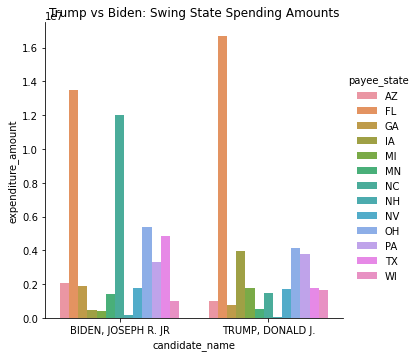

In [18]:
# now lets turn our focus to the main two candidates: Trump and Biden
cand_list = ['BIDEN, JOSEPH R. JR', 'TRUMP, DONALD J.']
top5_swing_totals = top5_swing_totals.reset_index()
plt_tbl = top5_swing_totals[top5_swing_totals['candidate_name'].isin(cand_list)]

sns.factorplot(x='candidate_name', y='expenditure_amount', hue='payee_state', data=plt_tbl, kind='bar').set(title = 'Trump vs Biden: Swing State Spending Amounts')

/var/folders/__/765s8f01353grpysl5ccy5q80000gn/T/ipykernel_39441/2565255474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_tbl["spending_prop"] = new_col
/Users/brianlin/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


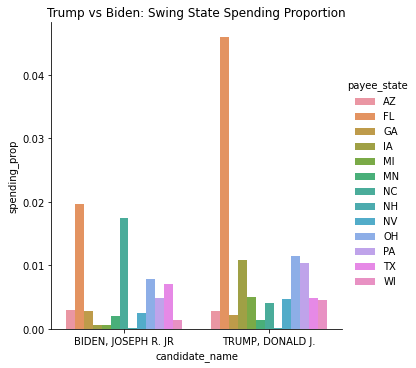

In [19]:
# now lets make the same graph as above but as a proportion of total spending for each candidate
trump_total = total_spendings[total_spendings['candidate_name']=='TRUMP, DONALD J.']['expenditure_amount']
biden_total = total_spendings[total_spendings['candidate_name']=='BIDEN, JOSEPH R. JR']['expenditure_amount']

temp = plt_tbl.apply(lambda row: row['expenditure_amount']/ trump_total if row['candidate_name']=='TRUMP, DONALD J.' else row['expenditure_amount'] / biden_total, axis = 1)
new_col = pd.concat([temp[0:13][0], temp[13:37][1]])
plt_tbl["spending_prop"] = new_col

sns.factorplot(x='candidate_name', y="spending_prop", hue='payee_state', data=plt_tbl, kind='bar').set(title = 'Trump vs Biden: Swing State Spending Proportion')


In [23]:
plt_tbl[['candidate_name', 'expenditure_amount']].groupby('candidate_name').sum()

,expenditure_amount
candidate_name,
"BIDEN, JOSEPH R. JR",48112013.91
"TRUMP, DONALD J.",39290936.55


In [21]:
plt_tbl[['candidate_name', 'spending_prop']].groupby('candidate_name').sum()

,spending_prop
candidate_name,
"BIDEN, JOSEPH R. JR",0.069863
"TRUMP, DONALD J.",0.108400


In [49]:
plt_tbl = plt_tbl[['candidate_name', 'payee_state', 'expenditure_amount', 'spending_prop']]
who_won_col = ['Biden', 'Trump', 'Biden', 'Trump', 'Biden', 'Biden', 'Trump', 'Biden', 'Biden', 'Trump', 'Biden', 'Trump', 'Biden']
state_spending = pd.pivot_table(plt_tbl, values='expenditure_amount', index=['payee_state'], columns = 'candidate_name').reset_index()
who_spent_more_col = ['Biden' if x else 'Trump' for x in (state_spending['BIDEN, JOSEPH R. JR'] - state_spending['TRUMP, DONALD J.'] > 0).tolist()]
state_spending['Who Spent More']= who_spent_more_col
state_spending['State Result'] = who_won_col
state_spending

candidate_name,payee_state,"BIDEN, JOSEPH R. JR","TRUMP, DONALD J.",Who Spent More,State Result
0,AZ,2045805.71,1027354.14,Biden,Biden
1,FL,13488442.25,16655083.73,Trump,Trump
2,GA,1905319.31,778796.65,Biden,Biden
3,IA,447491.94,3943679.17,Trump,Trump
4,MI,417348.55,1795355.45,Trump,Biden
5,MN,1418944.03,533094.35,Biden,Biden
6,NC,11984153.44,1465193.47,Biden,Trump
7,NH,143861.01,50506.35,Biden,Biden
8,NV,1750136.57,1719740.53,Biden,Biden
9,OH,5370556.80,4146489.64,Biden,Trump


In [50]:
sum(state_spending['Who Spent More'] == state_spending['State Result'])

7

# *** EDA Questions ***

**Trends / Relationships**

From the EDA and visualizations in this section, it seems like there is a lack of a relationship between increased spending in swing states and election outcomes. In terms of total spending on swing states, Biden did spend more; however, Biden spent a lot more money on his campaign overall compared to Trump, and when looking at the percentage of spent on swing states compared to total spendings, Trump actually put more of his campagin money percentage wise into the swing states. When looking at each swing state more closely, 7 out of the 13 swing states had the person spending more money win, which is not very indicative of a relationship between the two.

**Data Cleaning**

Many of the candidates indicated in the column 'candidate_name' have different forms, e.g. TRUMP, DONALD J. compared to TRUMP, DONALD J (without the dot). So before performing further analysis, we standardize these these naming conventions.

**Relevalence to Research Question**

The visualizations in this section are showing the spendings for Trump and Biden in swing states. We are interesting in seeing if there is a causal relationship between the increased spendings in swing states and the outcome of the relationship, but based on the visualizations above, it does not look likely. There is not a correlation seen so far in the EDA, so the visualization is not in favor of a causal relationship; however we have not accounted for confounders so we can not confirm or deny the causal relationship until we use further techniques to analyze this relationship.